# Overview

Articles:
* https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

<b> Keywords:</b> Principal Component Analysis, etc...

# Notebook Set-Up

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)           # prevents scientific notation

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [19]:
pd.set_option('display.max_columns', None)

github = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/transformed_datasets/'

# Census
census_ss = pd.read_csv(github + 'census_standard_scaled.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])
census_mm = pd.read_csv(github + 'census_minmax_scaled.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])

# Redfin
redfin_ss = pd.read_csv(github + 'redfin_standard_scaled.csv').fillna(0).drop(columns=['Unnamed: 0'])
redfin_mm = pd.read_csv(github + 'redfin_minmax_scaled.csv').fillna(0).drop(columns=['Unnamed: 0'])

pd.set_option('display.max_columns', None)

##### PCA

In [28]:
# function to plot pca componments into clusers by party labels
def pca_plot(df):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    ax.scatter(df['PC1'], df['PC2'], df['PC3'], c='red',  s=30, label = 'Pts')
    #ax.scatter(df[df['class'] == 0]['PC1'], df[df['class'] == 0]['PC2'], df[df['class'] == 0]['PC3'], c='blue', s=30, label = 'Good')
    
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    _ = plt.title("3D Scatter Plot Example")
    _ = plt.legend()
    _ = plt.tight_layout()
    _ = plt.show()
    return _

#### PCA Function

from sklearn.decomposition import PCA
import numpy as np

def perform_pca(df_set, pca_param):

    pca_input = df_set.copy()

    pca = PCA(pca_param) # alternative PCA method which chooses least components for specified variance 
    x = pca_input.iloc[:, :-1] # set x to explanatory variables
    principalComponents = pca.fit_transform(x)
    
    pca_cols = []
    for i in range(0,pca.n_components_):
        pca_cols.append('PC'+str(i+1))
    
    principalDf = pd.DataFrame(data=principalComponents, columns=pca_cols)
    
    print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    
    # PCA Loadings
    loadings = pd.DataFrame(pca.components_.T, columns=pca_cols, index=pca_input.columns[0:-1]).sort_values(by=pca_cols, ascending = False)

    # most important factors    
    features = pca_input.columns 
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
    most_important_names = [features[most_important[i]] for i in range(pca.n_components_)]       # get the names
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca.n_components_)}        # create reference dict    
    pca_3_df = pd.DataFrame(sorted(dic.items()),columns = ['Component','Field']) # build the dataframe
    
    return loadings, pca_3_df, principalDf 

# Census - Standard Scaled

[0.46286669 0.19112109 0.0790345 ] 0.7330222821508959


,PC1,PC2,PC3
kitchen_complete,0.289,0.175,0.053
plumbing_complete,0.289,0.175,0.053
one_person_household,0.285,0.188,0.069
more_than_200k,0.283,0.091,0.009
renter_occuppied,0.278,0.194,0.034
transportation_drive_alone,0.278,0.165,0.066
owners_25_34,0.274,0.148,0.091
vacant_units,0.258,0.189,0.012
median_gross_rent,0.228,-0.261,-0.158
black_homeowners,0.218,0.193,0.072


[0.46286669 0.19112109 0.0790345 ] 0.733022282149294


,Component,Field
0,PC1,kitchen_complete
1,PC2,mhhi
2,PC3,mean_household_size_renter


[0.46286669 0.19112109 0.0790345 ] 0.733022282150057


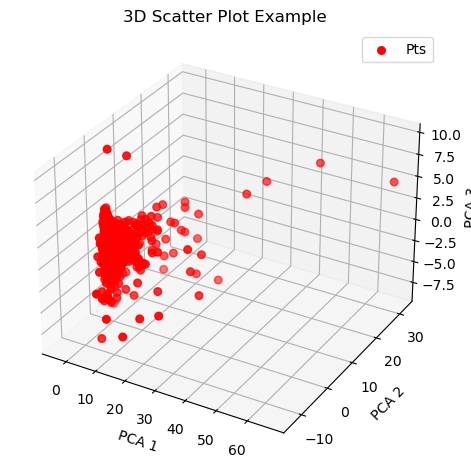

In [29]:
###################
# Plot Options
# pylab for 3d plot
#%pylab
#%matplotlib inline  
display(perform_pca(census_ss, 3)[0])

display(perform_pca(census_ss, 3)[1])

pca_plot(perform_pca(census_ss, 3)[2])

# Census Min-Max Scaled

[0.528187   0.14502826 0.08578191] 0.7589971646697531


,PC1,PC2,PC3
mhhi,0.424,-0.258,0.024
mhhi_nonfamily,0.410,-0.196,0.035
median_gross_rent,0.400,0.198,0.046
mhhi_family,0.400,-0.258,-0.108
median_home_value,0.318,0.140,0.037
lower_quartile_home_value,0.316,0.138,0.027
upper_quartile_home_value,0.270,0.119,0.036
owners_25_34,0.106,0.191,0.014
more_than_200k,0.085,0.128,0.029
vacant_units,0.078,0.218,0.001


[0.528187   0.14502826 0.08578191] 0.75899716466977


,Component,Field
0,PC1,mhhi
1,PC2,median_gross_rent_frac_income
2,PC3,mean_household_size_renter


[0.528187   0.14502826 0.08578191] 0.75899716466974


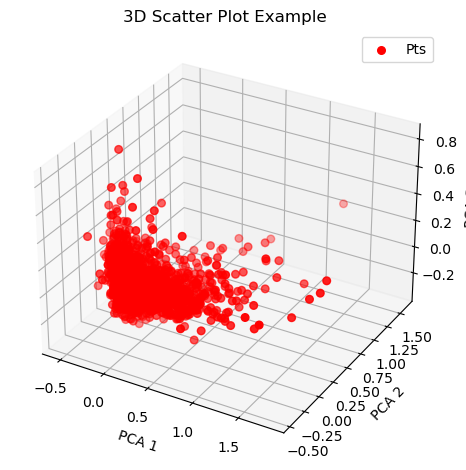

In [21]:
###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(census_mm, 3)[0])

display(perform_pca(census_mm, 3)[1])

pca_plot(perform_pca(census_mm, 3)[2])

# Redfin - Standard Scaled

[0.0852839  0.07123894 0.05890674] 0.21542958510804752


,PC1,PC2,PC3
homes_sold,0.472,0.143,-0.142
new_listings,0.441,0.124,-0.150
pending_sales,0.431,0.127,-0.133
inventory,0.426,0.117,-0.171
median_list_price,0.141,0.017,0.182
median_list_ppsf,0.135,0.015,0.164
avg_sale_to_list,0.117,0.147,0.390
median_sale_price,0.114,0.028,0.161
sold_above_list,0.110,0.170,0.401
off_market_in_two_weeks,0.061,0.037,0.095


[0.0852839  0.07123895 0.05890658] 0.2154294379313438


,Component,Field
0,PC1,homes_sold
1,PC2,state
2,PC3,sold_above_list


[0.0852839  0.07123893 0.05890664] 0.21542947459405207


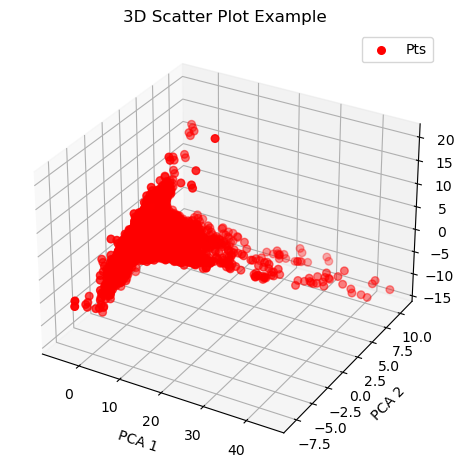

In [22]:
###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(redfin_ss, 3)[0])

display(perform_pca(redfin_ss, 3)[1])

pca_plot(perform_pca(redfin_ss, 3)[2])

# Redfin - MinMax Scaled

[0.20776516 0.18877952 0.1562846 ] 0.5528292805418005


,PC1,PC2,PC3
property_type,0.143,0.105,0.752
property_type_id,0.130,0.092,0.611
median_dom,0.007,0.002,-0.002
months_of_supply,0.001,0.000,-0.001
region_type_id,-0.000,-0.000,0.000
median_ppsf_mom,-0.000,0.000,-0.000
median_sale_price_mom,-0.000,0.000,-0.000
median_ppsf,-0.000,-0.000,0.000
median_ppsf_yoy,-0.000,-0.000,0.000
homes_sold_yoy,-0.001,-0.001,-0.000


[0.20776516 0.18877952 0.1562846 ] 0.5528292805418007


,Component,Field
0,PC1,off_market_in_two_weeks_yoy
1,PC2,state
2,PC3,property_type


[0.20776516 0.18877952 0.1562846 ] 0.5528292805418015


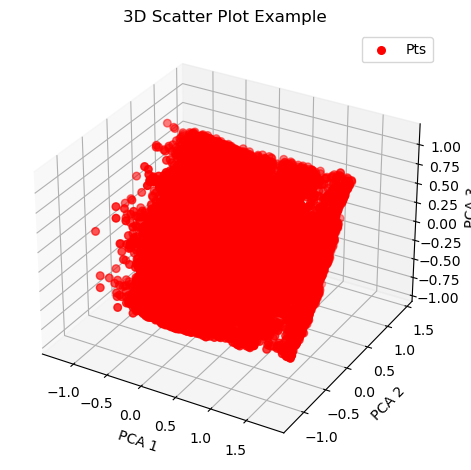

In [23]:
###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(redfin_mm, 3)[0])

display(perform_pca(redfin_mm, 3)[1])

pca_plot(perform_pca(redfin_mm, 3)[2])